# Time Series (Stock) Prediction Using LSTM 

In [1]:
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime

### Exploratory Analysis of the Data

In [8]:
data = pd.read_csv("AppleStock.csv")

data['datetime'] = pd.to_datetime(data['datetime'])

print(data.head())
print(data.info())
print(data.describe())

    datetime    open       high        low      close     volume
0 2025-09-24  255.22  255.73000  251.03999  252.31000   42157958
1 2025-09-23  255.88  257.34000  253.58000  254.42999   60275200
2 2025-09-22  248.30  256.64001  248.12000  256.07999  105517400
3 2025-09-19  241.23  246.30000  240.21001  245.50000  163741300
4 2025-09-18  239.97  241.20000  236.64999  237.88000   44249600
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1000 non-null   datetime64[ns]
 1   open      1000 non-null   float64       
 2   high      1000 non-null   float64       
 3   low       1000 non-null   float64       
 4   close     1000 non-null   float64       
 5   volume    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.0 KB
None
                         datetime         open         high   

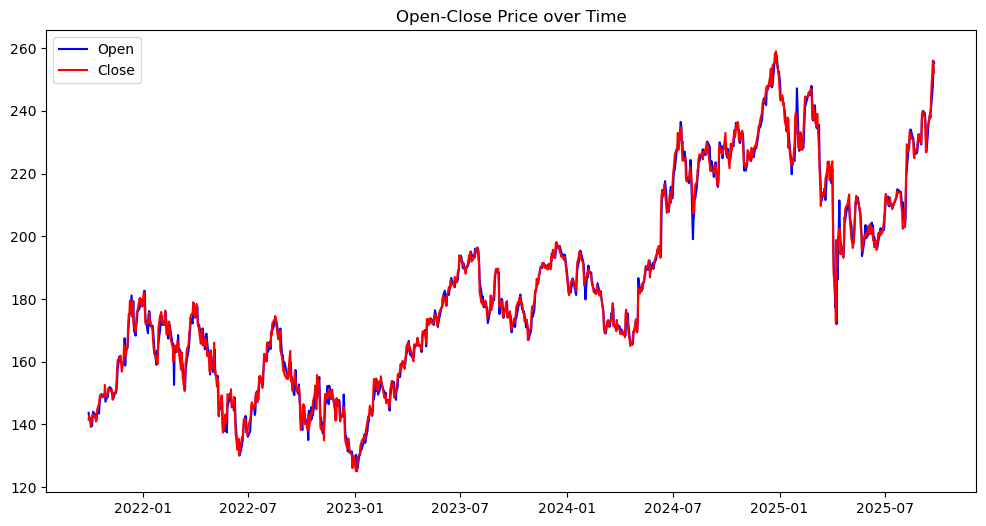

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data['datetime'], data['open'], label="Open",color="blue")
plt.plot(data['datetime'], data['close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show()

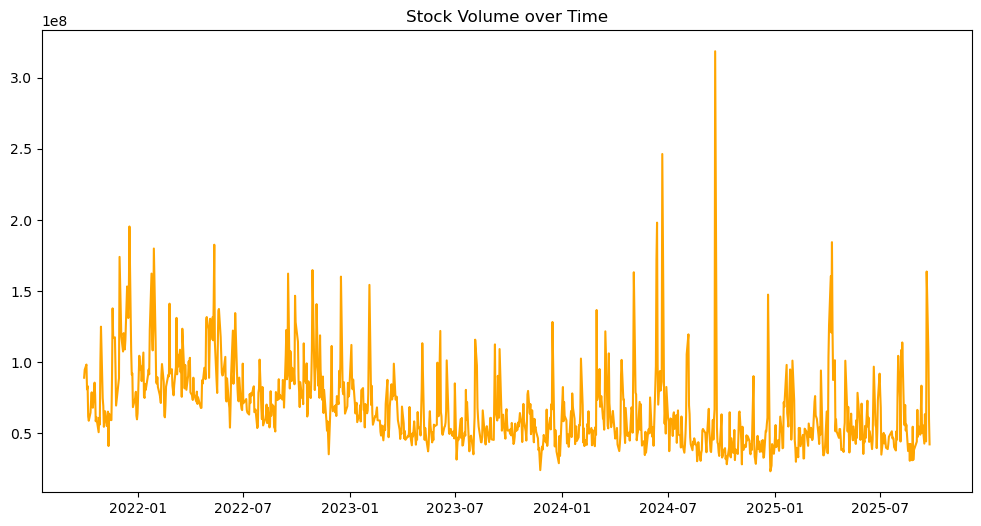

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data['datetime'],data['volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
plt.show()

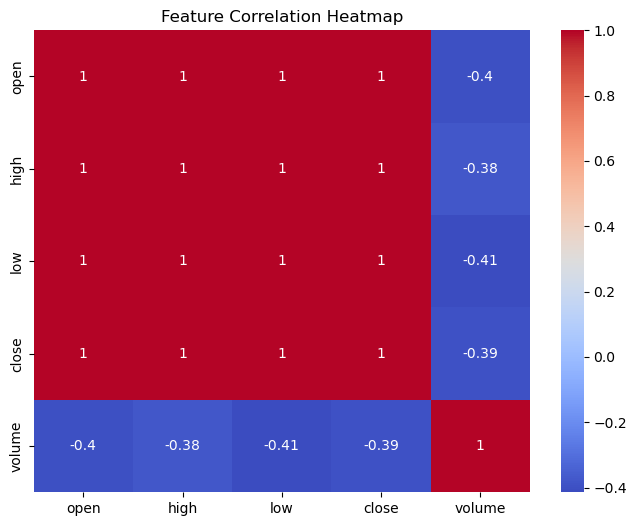

In [11]:
numeric_data = data.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Data Preprocessing